# **Task 1**
**Web scraping and analysis**

 started with web scraping. We will use a package called BeautifulSoup to collect the data from the web. Once collected your data and saved it into a local .csv file you should start with your analysis.

**Scraping data from Skytrax**

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use Python and BeautifulSoup to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | British Airways absolutely ...
1,✅ Trip Verified | My recent experience with B...
2,✅ Trip Verified | This is to express our disp...
3,✅ Trip Verified | I flew London to Malaga on ...
4,✅ Trip Verified | I arrived at the airport ab...


In [ ]:
df

,reviews
0,✅ Trip Verified | British Airways absolutely ...
1,✅ Trip Verified | My recent experience with B...
2,✅ Trip Verified | This is to express our disp...
3,✅ Trip Verified | I flew London to Malaga on ...
4,✅ Trip Verified | I arrived at the airport ab...
...,...
995,✅ Trip Verified | London to Bangkok. I am not ...
996,✅ Trip Verified | Abu Dhabi to London. Althou...
997,✅ Trip Verified | Gatwick to Orlando. Stains ...
998,✅ Trip Verified | Newcastle to Las Vegas via L...


In [ ]:
df.reviews= df.reviews.str.split('|',expand=True)[1]
df

,reviews
0,British Airways absolutely does not care. My...
1,My recent experience with British Airways wa...
2,This is to express our displeasure and conce...
3,I flew London to Malaga on 27 August in Club...
4,I arrived at the airport about 2.5 hours bef...
...,...
995,London to Bangkok. I am not a fan if the BA c...
996,"Abu Dhabi to London. Although a BA flight, t..."
997,"Gatwick to Orlando. Stains on the seat, cott..."
998,Newcastle to Las Vegas via London. Both my fl...


# **Rule-based approach**
This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.



**Data preprocessing steps:**

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

**Step 1: Cleaning the text**

In [ ]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,British Airways absolutely does not care. My...,British Airways absolutely does not care My r...
1,My recent experience with British Airways wa...,My recent experience with British Airways was...
2,This is to express our displeasure and conce...,This is to express our displeasure and concer...
3,I flew London to Malaga on 27 August in Club...,I flew London to Malaga on August in Club Eur...
4,I arrived at the airport about 2.5 hours bef...,I arrived at the airport about hours before t...


**Step 2: Tokenization**

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).


**Step 3: Enrichment – POS tagging**

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.


**Step 4: Stopwords removal**

Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

**Step 5: Obtaining the stem words**
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.
The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

**NLTK** is a leading platform for building Python programs to work with human language data.

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along
with a suite of text processing libraries for classification, tokenization, stemming, tagging,
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries


In [ ]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,British Airways absolutely does not care. My...,British Airways absolutely does not care My r...,"[(British, a), (Airways, n), (absolutely, r), ..."
1,My recent experience with British Airways wa...,My recent experience with British Airways was...,"[(recent, a), (experience, n), (British, n), (..."
2,This is to express our displeasure and conce...,This is to express our displeasure and concer...,"[(express, v), (displeasure, n), (concerns, n)..."
3,I flew London to Malaga on 27 August in Club...,I flew London to Malaga on August in Club Eur...,"[(flew, v), (London, n), (Malaga, n), (August,..."
4,I arrived at the airport about 2.5 hours bef...,I arrived at the airport about hours before t...,"[(arrived, v), (airport, n), (hours, n), (take..."


In [ ]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,British Airways absolutely does not care. My...,British Airways absolutely does not care My r...,"[(British, a), (Airways, n), (absolutely, r), ...",British Airways absolutely care reserve seat...
1,My recent experience with British Airways wa...,My recent experience with British Airways was...,"[(recent, a), (experience, n), (British, n), (...",recent experience British Airways horrendous...
2,This is to express our displeasure and conce...,This is to express our displeasure and concer...,"[(express, v), (displeasure, n), (concerns, n)...",express displeasure concern regard flight It...
3,I flew London to Malaga on 27 August in Club...,I flew London to Malaga on August in Club Eur...,"[(flew, v), (London, n), (Malaga, n), (August,...",fly London Malaga August Club Europe stand a...
4,I arrived at the airport about 2.5 hours bef...,I arrived at the airport about hours before t...,"[(arrived, v), (airport, n), (hours, n), (take...",arrive airport hour takeoff time get check g...


In [ ]:
df[['reviews','Lemma']]


,reviews,Lemma
0,British Airways absolutely does not care. My...,British Airways absolutely care reserve seat...
1,My recent experience with British Airways wa...,recent experience British Airways horrendous...
2,This is to express our displeasure and conce...,express displeasure concern regard flight It...
3,I flew London to Malaga on 27 August in Club...,fly London Malaga August Club Europe stand a...
4,I arrived at the airport about 2.5 hours bef...,arrive airport hour takeoff time get check g...
...,...,...
995,London to Bangkok. I am not a fan if the BA c...,London Bangkok fan BA configuration Business...
996,"Abu Dhabi to London. Although a BA flight, t...",Abu Dhabi London Although BA flight sector o...
997,"Gatwick to Orlando. Stains on the seat, cott...",Gatwick Orlando Stains seat cotton bud seat ...
998,Newcastle to Las Vegas via London. Both my fl...,Newcastle Las Vegas via London flight great ...


**Sentiment Analysis using VADER**

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [ ]:
!pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,British Airways absolutely does not care. My...,British Airways absolutely does not care My r...,"[(British, a), (Airways, n), (absolutely, r), ...",British Airways absolutely care reserve seat...,-0.9022,Negative
1,My recent experience with British Airways wa...,My recent experience with British Airways was...,"[(recent, a), (experience, n), (British, n), (...",recent experience British Airways horrendous...,-0.9272,Negative
2,This is to express our displeasure and conce...,This is to express our displeasure and concer...,"[(express, v), (displeasure, n), (concerns, n)...",express displeasure concern regard flight It...,-0.4588,Negative
3,I flew London to Malaga on 27 August in Club...,I flew London to Malaga on August in Club Eur...,"[(flew, v), (London, n), (Malaga, n), (August,...",fly London Malaga August Club Europe stand a...,-0.7430,Negative
4,I arrived at the airport about 2.5 hours bef...,I arrived at the airport about hours before t...,"[(arrived, v), (airport, n), (hours, n), (take...",arrive airport hour takeoff time get check g...,-0.0258,Negative


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    491
Negative    404
Neutral     105
Name: Analysis, dtype: int64

**Visual Representation**


([<matplotlib.patches.Wedge at 0x7a212f9a7bb0>,
 [Text(0.031097634977506766, 1.0995603380891865, 'Positive'),
  Text(-0.3855877282896095, -1.0302048843761413, 'Negative'),
  Text(1.2772152593917465, -0.43728844162277347, 'Neutral')],
 [Text(0.016962346351367324, 0.5997601844122834, '49.1%'),
  Text(-0.21032057906705973, -0.5619299369324406, '40.4%'),
  Text(0.8041725707281367, -0.27532975954026473, '10.5%')])

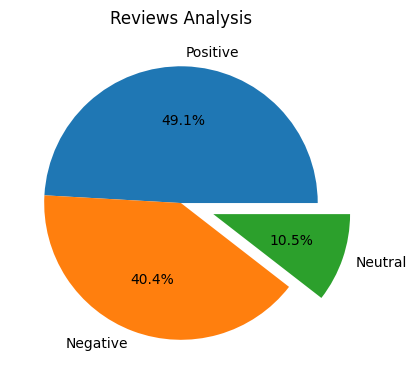

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
df.to_csv("BA_reviews.csv")


**Wordcloud**

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

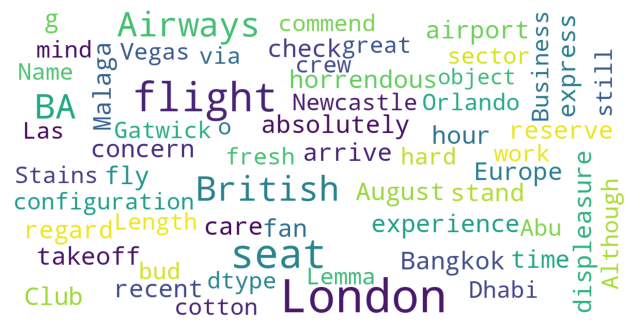

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(8, 10))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)